# Image classification: cats & dogs

In [1]:
# Handle imports up-front
import glob
import random
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image


2024-12-08 17:46:44.967767: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1. Data preparation

### 1.1. Load the data paths

In [2]:
# Set the path to the training data
training_data_path='../data2/data/train'

# Get a list of training dog and cat images
training_dogs=glob.glob(f'{training_data_path}/train/dog.*')
training_cats=glob.glob(f'{training_data_path}/cat/cat.*')



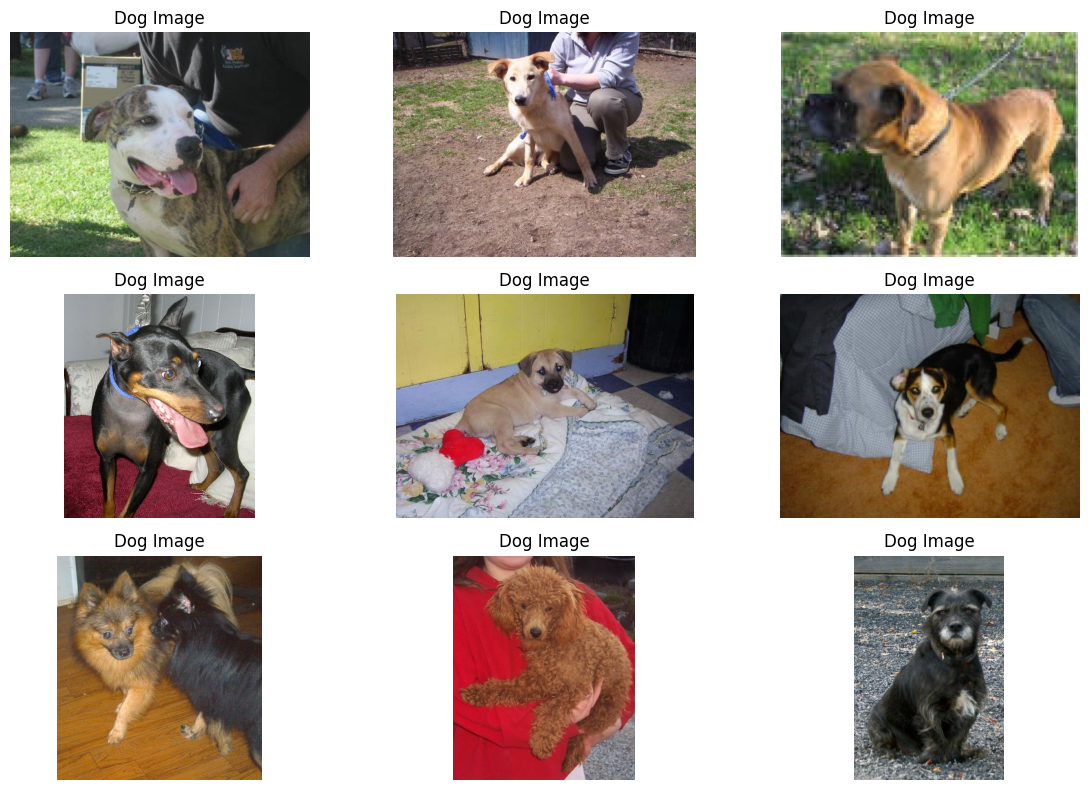

In [3]:
import os

train_dir="../data/train"

dog_subfolder = os.path.join(train_dir, "dog")

dog_image_files = os.listdir(dog_subfolder)

dog_images= []

for i in range(9):

    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    dog_images.append(img_array)

plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])    
    plt.title('Dog Image')
    plt.axis('off')

plt.tight_layout()

plt.show()

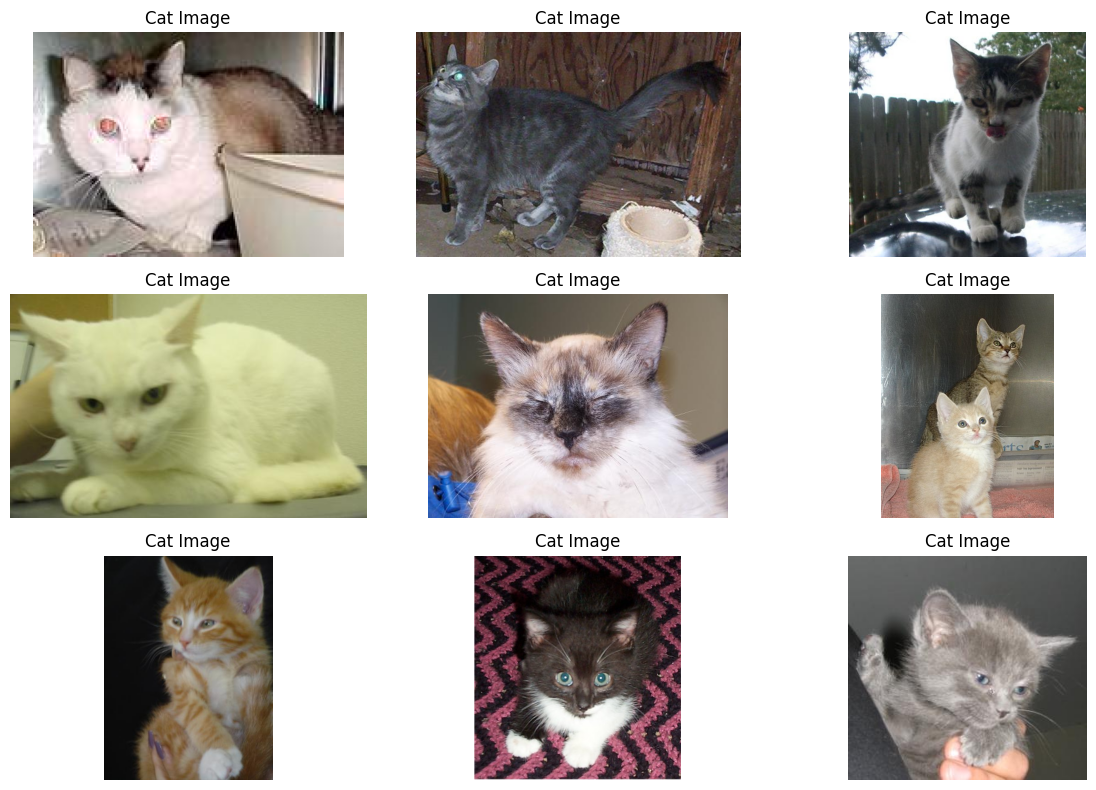

In [4]:
# Import and Check first 9 Cat Pictures
# Get a list of all cat image file names
cats_subfolder = os.path.join(train_dir, "cat")
# Get a list of all Cat image file names
cats_image_files = os.listdir(cats_subfolder)
# Load the first nine cat images
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limit to available cat images
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)
# Create a single figure to display all cat images
plt.figure(figsize=(12, 8))
for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')
# Adjust Layout
plt.tight_layout()
# Show the pictures
plt.show()

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten

# Define a few rules for DataGen
image_size = (224, 224)
datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()
# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"]
)
# Test directory
test_dir = "../data/test"
# Test Data Generation
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size = image_size,
    classes = ["dog", "cat"]
)

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


### 1.2. Inspect

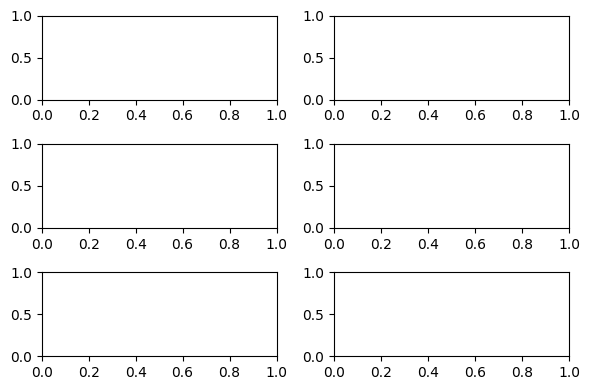

In [6]:
fig, axs = plt.subplots(3,2,figsize=(6, 4))

for cat, dog, row in zip(training_cats, training_dogs, axs):
    for animal, ax in zip([cat, dog], row):
        animal=image.load_img(animal)
        animal=image.img_to_array(animal)
        animal/=255.0
        ax.imshow(animal)
        ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten

In [8]:
# model = Sequential()
# model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
# model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')  # Output layer with 2 classes (dog and cat)
])

/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-08 17:47:07.113382: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37748736 exceeds 10% of free system memory.
2024-12-08 17:47:07.193308: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37748736 exceeds 10% of free system memory.
2024-12-08 17:47:07.215665: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37748736 exceeds 10% of free system memory.


In [9]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
hist = model.fit(train_data, epochs=10, validation_data=test_data)


from tensorflow.keras.preprocessing.image import ImageDataGenerator

/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2024-12-08 17:47:09.656029: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37748736 exceeds 10% of free system memory.
2024-12-08 17:47:10.653069: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 100933632 exceeds 10% of free system memory.


1/3 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.5000 - loss: 3.0022

3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.4719 - loss: 663.7767 - val_accuracy: 0.5000 - val_loss: 109.3533
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5312 - loss: 62.5971 - val_accuracy: 0.5000 - val_loss: 17.4782
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.4844 - loss: 12.9925 - val_accuracy: 0.5000 - val_loss: 12.4710
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.4646 - loss: 7.4071 - val_accuracy: 0.5000 - val_loss: 4.9537
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4836 - loss: 3.5503 - val_accuracy: 0.5000 - val_loss: 1.1597
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4849 - loss: 1.0853 - val_accuracy: 0.5000 - val_loss: 0.9192
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4026 - loss: 0.9600 - val_accuracy: 0.5000 - val_loss: 0.7715
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6078 - loss: 0.6276 - val_accuracy: 0.3000 - val_loss: 0.7467
Epoch 9/10
3/3 ━

## 2. EDA

Let's take a look at a few of our images to get a feel for how image data is structured.

### 2.1. Image data

Image shape: (270, 287, 3)


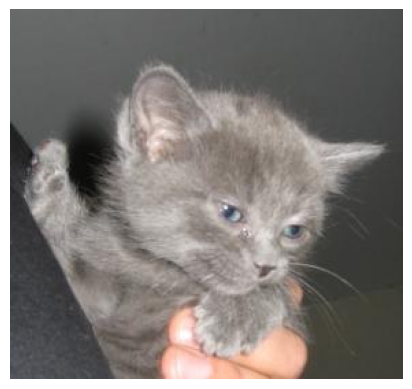

In [ ]:
# Load one of the images as an array and look at it's shape - what do you see, what are the dimensions? Are they what you expect?
image_path = os.path.join(cats_subfolder, cats_image_files[i])

img = image.load_img(os.path.join(cats_subfolder, cats_image_files[i]))

img_array = image.img_to_array(img)

print("Image shape:", img_array.shape)

plt.imshow(img_array.astype('uint8'))
plt.axis('off')  
plt.show()

Image shape: (270, 287, 3)


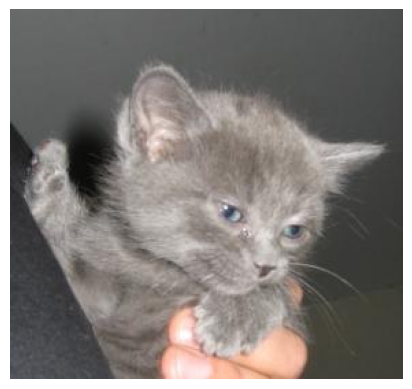

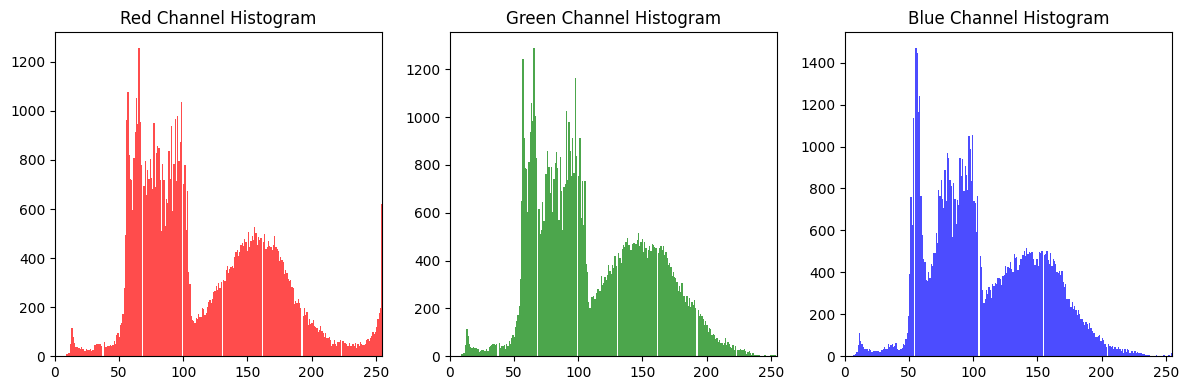

In [17]:
# Plot a histogram of the three 2D arrays which comprise the image. What do you see?
# Assuming the path and image files are defined earlier
# image_path = os.path.join(cats_subfolder, cats_image_files[i])

img = image.load_img(image_path)

img_array = image.img_to_array(img)

print("Image shape:", img_array.shape)

plt.imshow(img_array.astype('uint8'))
plt.axis('off')  
plt.show()

red = img_array[:, :, 0]
green = img_array[:, :, 1]
blue = img_array[:, :, 2]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(red.ravel(), bins=256, color='red', alpha=0.7)
plt.title('Red Channel Histogram')
plt.xlim(0, 255)

plt.subplot(1, 3, 2)
plt.hist(green.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Green Channel Histogram')
plt.xlim(0, 255)

plt.subplot(1, 3, 3)
plt.hist(blue.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Blue Channel Histogram')
plt.xlim(0, 255)

plt.tight_layout()
plt.show()

### 2.2. Image dimensions

Let's take a look at a random sample of images from the dataset and see what their dimensions are.

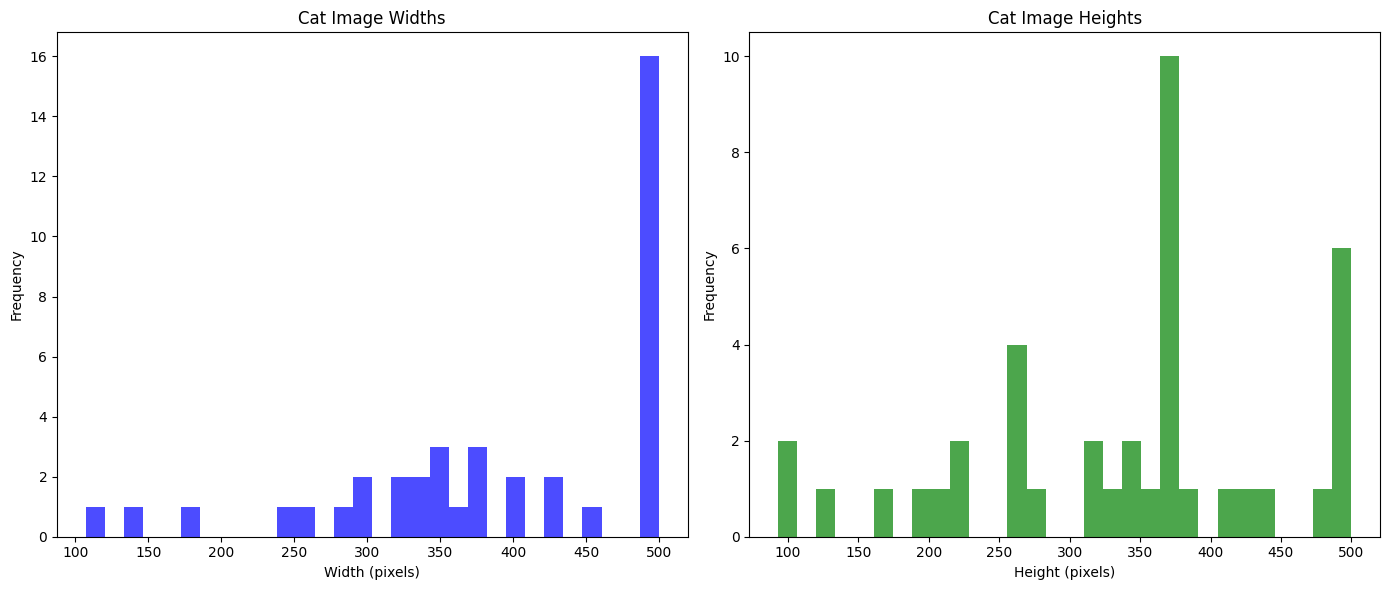

In [19]:
# Loop over a few hundred images and extract their width and heigh, plot both as a histogram. What do you see, does this information matter to us, if so, how?

cats_subfolder = os.path.join(train_dir, "cat")

widths = []
heights = []

for i in range(min(300, len(cats_image_files))):  # Limit to available cat images
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0

    img = image.load_img(img_path)

    width, height = img.size

    widths.append(width)
    heights.append(height)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='blue', alpha=0.7)
plt.title('Cat Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='green', alpha=0.7)
plt.title('Cat Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 2.3. Image aspect ratios

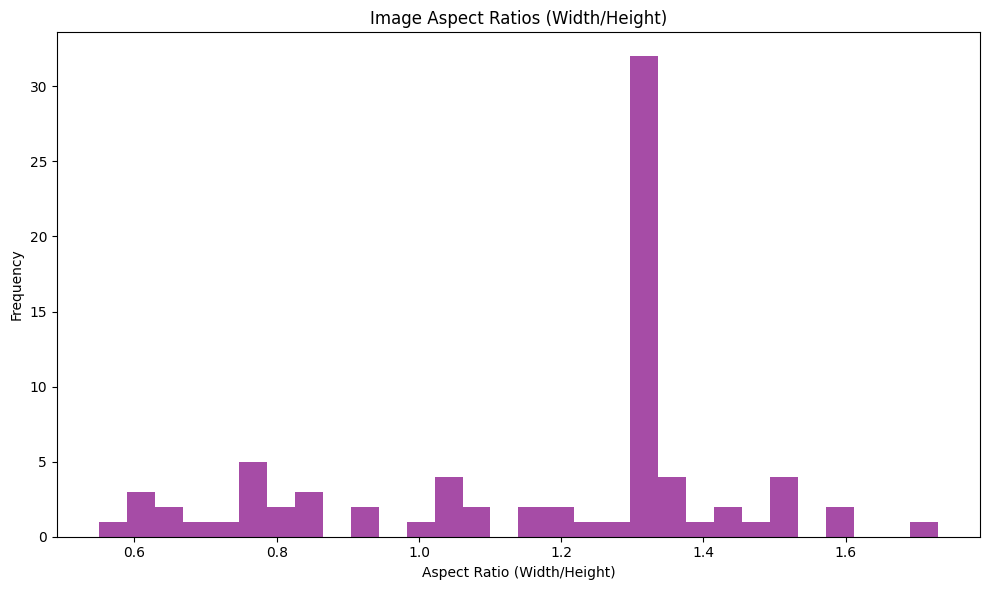

In [ ]:
# Plot a histogram of the image aspect ratios (i.e. width/height) What do you see, does this information matter to us, if so, how?

aspect_ratios = []

for cats_subfolder in os.listdir(train_dir):
    cats_subfolder_path = os.path.join(train_dir, cats_subfolder)

    if os.path.isdir(cats_subfolder_path):

        for img_filename in os.listdir(cats_subfolder_path):
         
            img_path = os.path.join(cats_subfolder_path, img_filename)

            if not img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            img = image.load_img(img_path)

            width, height = img.size

            aspect_ratio = width / height
            aspect_ratios.append(aspect_ratio)

plt.figure(figsize=(10, 6))

plt.hist(aspect_ratios, bins=30, color='purple', alpha=0.7)

plt.title('Aspect Ratios (Width/Height)')
plt.xlabel('Aspect Ratio (Width/Height)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



## 3. Build the model

### 3.1. Prepare images for streaming

In [20]:
def make_datasets(training_data_path: str, image_dim: int, batch_size: int=16):

    training_dataset=tf.keras.utils.image_dataset_from_directory(
        training_data_path,
        validation_split=0.2,
        subset='training',
        seed=315,
        image_size=(image_dim, image_dim),
        batch_size=batch_size
    ).repeat()

    validation_dataset=tf.keras.utils.image_dataset_from_directory(
        training_data_path,
        validation_split=0.2,
        subset='validation',
        seed=315,
        image_size=(image_dim, image_dim),
        batch_size=batch_size
    ).repeat()

    return training_dataset, validation_dataset

training_dataset, validation_dataset=make_datasets(training_data_path, 128)

NotFoundError: Could not find directory ../data2/data/train

### 3.1. Model definition

In [ ]:
def compile_model(image_dim, learning_rate):

    initializer=tf.keras.initializers.GlorotUniform(seed=315)

    model=Sequential([
        layers.Input((image_dim, image_dim, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, 3, padding='same', activation='relu', kernel_initializer=initializer),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer=initializer),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer=initializer),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_initializer=initializer),
        layers.Dense(1, activation='sigmoid', kernel_initializer=initializer)
    ])

    optimizer=keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['binary_accuracy'])

    return model

model=compile_model(128, 0.001)
model.summary()

### 3.2. Model training

In [ ]:
training_results=model.fit(
  training_dataset,
  validation_data=validation_dataset,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=5
)

In [ ]:
# Take a look at what information 'training_results' contains. Plot the training and validation accuracy (and binary cross-entropy if you like) over the training epoch. Is the model learning? If not, what do you think is wrong?

### 3.3. Model optimization

In [ ]:
# Try optimizing the learning rate and the batch size using a few values near the default settings. Hint: use a loop!

In [ ]:
# Pick the best values for learning rate and batch size and train the model for longer

## 4. Evaluate the model

In [ ]:
# Test the model out on the test data - is it as good as you expected, given the training data? Worse? Better? Why?